Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Importing the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/News.csv')
data.head()

Mounted at /content/drive


,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Data Preprocessing

In [4]:
data.shape

(44919, 6)

In [5]:
data= data.drop(["title","subject","date","Unnamed: 0"], axis=1)

In [6]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [7]:
data.shape

(44919, 2)

In [8]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
unique_subjects = data['class'].unique()
print(unique_subjects)

[0 1]


<Axes: xlabel='class'>

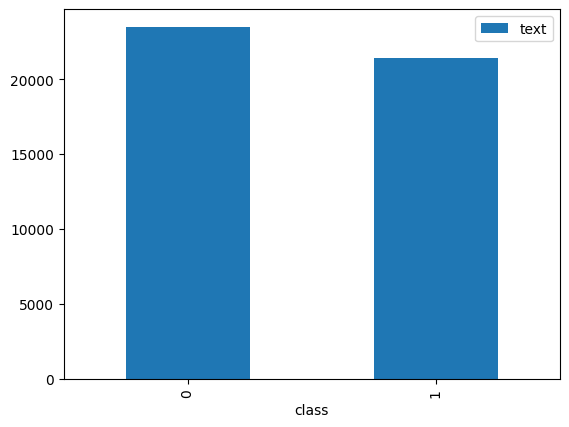

In [10]:
data.groupby('class').count().plot(kind='bar')

<Axes: >

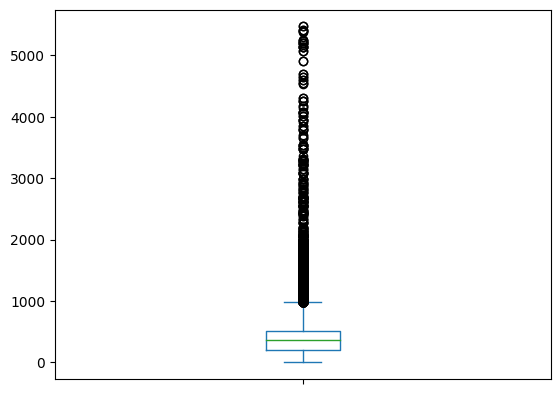

In [11]:
news_len = pd.Series([len(news.split()) for news in data['text']])
news_len.plot(kind='box')

In [12]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [13]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [36:46<00:00, 20.36it/s]


Visualization of WordCloud for Fake and Real News

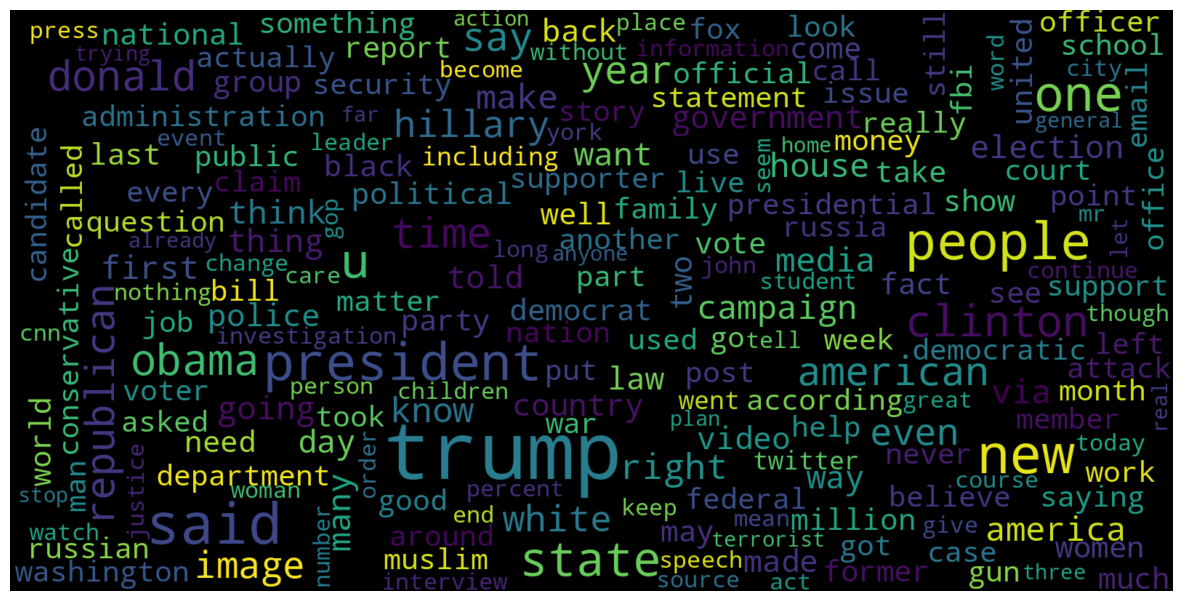

In [14]:
# FAKE NEWS
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

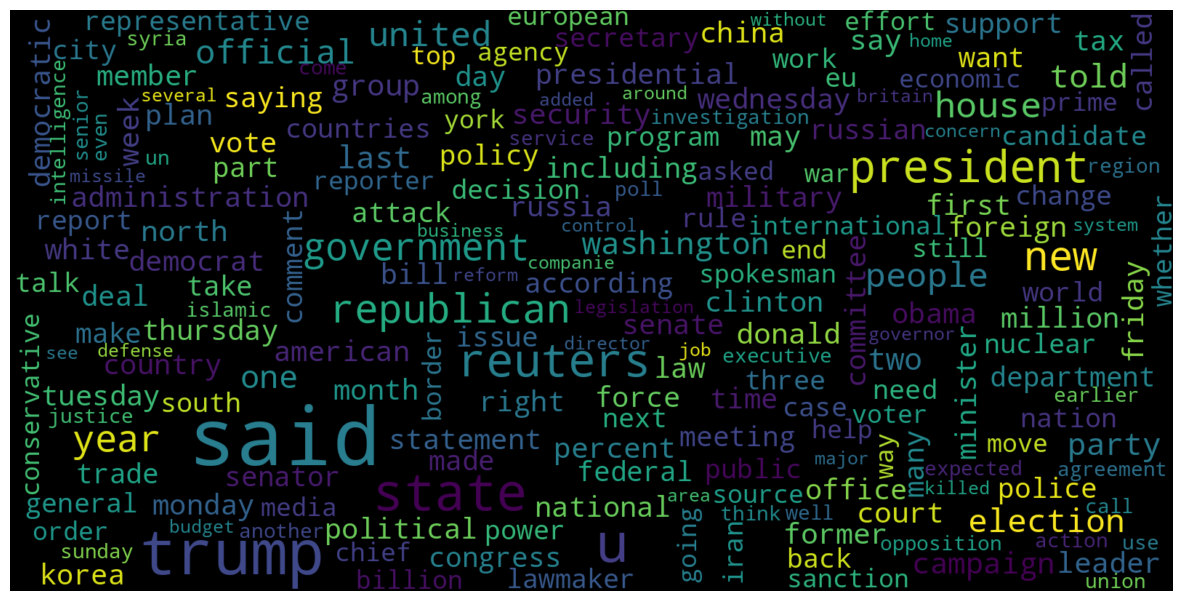

In [15]:
# REAL NEWS
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Bar Graph of Top 20 Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

In [18]:
common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

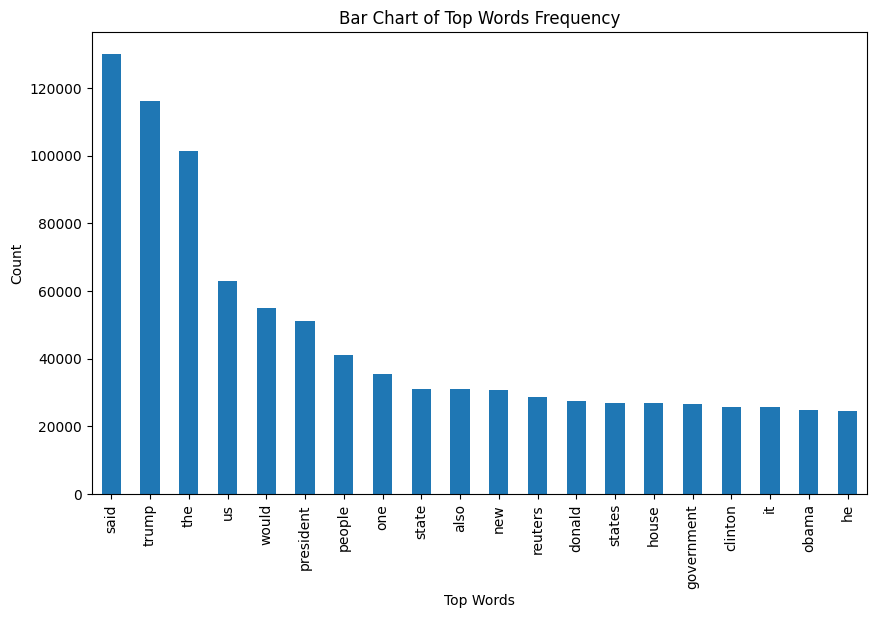

In [19]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [20]:
def news_to_words(news):
    ''' Convert news text into a sequence of words '''
    text = news.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

print("\nOriginal news ->", data['text'][0])
print("\nProcessed news ->", news_to_words(data['text'][0]))


Original news -> donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media the former reality show star one job as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish only trump his lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america i also accept regaining control congress miranda yaver mirand

In [21]:
X = list(map(news_to_words, data['text']))

In [23]:
print(len(X))

44919


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
Y = le.fit_transform(data['class'])

In [26]:
print(data['text'][0])
print(X[0])
print(data['class'][0])
print(Y[0])

donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media the former reality show star one job as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish only trump his lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america i also accept regaining control congress miranda yaver mirandayaver december 31

Tokenizing & Padding

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', data['text'][0])
X, tokenizer = tokenize_pad_sequences(data['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media the former reality show star one job as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america as country rapidly grows stronger smarter i want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish only trump his lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america i also accept regaining control congress mirand

In [28]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

Training & Testing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

Model: Logistic Regression

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9937071447653537
0.989047195013357


Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.996260017809439


Confusion Matrix

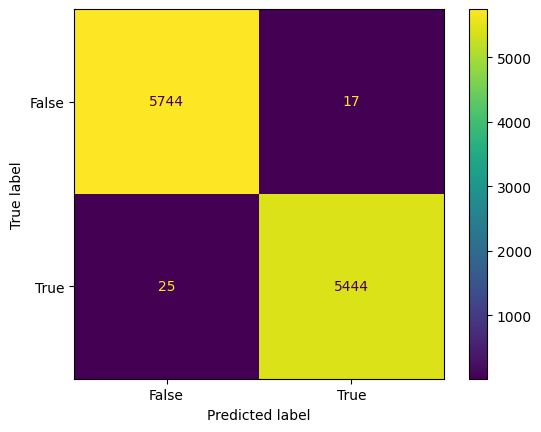

In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()